<h1 align=center><font size = 5>Capstone Project - Week 1 and 2</font></h1>

<font color='#0283C5'>**Disclaimer**: Sometimes Folium maps are not properly shown in Github. **Solution**: copy the github link in [**nbviewer**](https://nbviewer.jupyter.org/)!</font>

<h1 align=left><font size = 5>A New life, but what type of business do I open?</font></h1>

# 1. Introduction

In this project I analyze the situation of those who want to open a new business in **London**, but do not know what type of business, and have the opportunity to analyze the current market trends per neighbourhood.
For simplicity, costs analysis will be a general indication and will not take into account differencies across neighbourhoods.
Furthermore, London is composed of 32 local authority districts (or boroughs), and the analysis will be restricted to the **Inner London** which considers only 12 boroughs out of 32.

This analysis can be seen as a market study that answers two questions:
- **What business should I open**, after analyzing the businesses trends in the area?
- After taking into account opening costs, **which one is the most affordable**?

# 2. Data

For this type of analysis we need the following data:
- List of **London boroughs** and neighbourhoods (or districts). [Source: Wikipedia]
- **Type of businesses** in the considered districts. [Source: Foursquare API]
- **Cost of opening** a business in London. [Google Search]

# 3. Methodology

## 3.1 Methodology for retrieving Data

- London boroughs will be loaded into a **Pandas** dataframe after web-scraping the wikipedia page with **Beautiful Soup**. Then, the dataframe will be "cleaned" and ready to be analyzed.
- The data will be clustered using the **scikit-learn** package using a kMeans ML algorithm, which is a type of unsupervised machine learning method.
- The trending businesses will be retrieved using the **Foursquare API**.
- The maps will be displayed with **Folium** and finally a brief cost analysis will be plotted using **matplotlib**.

## 3.2 Load all the packages

In [108]:
#Install the required packages before starting
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c anaconda beautifulsoup4

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

^C


In [109]:
pip install pgeocode

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\fabio\anaconda3\lib\site-packages (from pgeocode) (1.1.3)



In [1]:
#for dataframe analysis
import pandas as pd 

# for data analysis
import numpy as np 

#for http requests
import requests 

#for web-scraping
from bs4 import BeautifulSoup

# for plots
import matplotlib.cm as cm 
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#Machine Learning clustering from scikit-learn
from sklearn.cluster import KMeans

# for converting an address into latitude and longitude values
from geopy.geocoders import Nominatim 

#for getting coordinates of neighbourhoods
import pgeocode

#for map renderings
import folium

## 3.3 Let's get some data

As stated before London is big! It is composed of **32 boroughs**, and in this analysis I will take into consideration 12 of the 32 boroughs, which compose the so called **Inner London** (or Metropolitan area) as shown in the picture below in **pink**.

<a href="https://en.wikipedia.org/wiki/London_boroughs#/media/File:Greater_London_composite_parts.PNG"><img src = "https://upload.wikimedia.org/wikipedia/commons/c/ce/Greater_London_composite_parts.PNG" width = 600> </a>

#### First of all I download from the wikipedia page a list of London boroughs, and create a *Pandas* dataframe using *BeautifulSoup* as web-scraper:

In [342]:
#Source url
url='https://en.wikipedia.org/wiki/London_boroughs'

#get response
r = requests.get(url)
r.status_code

200

In [343]:
#find table with Soup and load it into the "london" variable
soup = BeautifulSoup(r.text, 'html.parser')
london_b = soup.find('table',{'class':'wikitable sortable'})

In [344]:
#Transform the BeautifulSoup response in a Pandas dataframe
df=pd.read_html(str(london_b))
df=pd.DataFrame(df[0])
df.iloc[3,0]='Hammersmith and Fulham'
df.iloc[12,0]='Barking'
df

,London borough,Designation,Former areas,Former areas.1,Former areas.2,Former areas.3,Former areas.4
0,Camden,Inner,Hampstead (11a),St Pancras (11b),Holborn (11c),NaN,NaN
1,Greenwich,Inner,Greenwich (22a),Woolwich (part) (22b),NaN,NaN,NaN
2,Hackney,Inner,Hackney (9a),Shoreditch (9b),Stoke Newington (9c),NaN,NaN
3,Hammersmith and Fulham,Inner,Hammersmith (4a),Fulham (4b),NaN,NaN,NaN
4,Islington,Inner,Islington (10a),Finsbury (10b),NaN,NaN,NaN
5,Kensington and Chelsea,Inner,Kensington (3a),Chelsea (3b),NaN,NaN,NaN
6,Lambeth,Inner,Lambeth (6a),Wandsworth (part) (6b),NaN,NaN,NaN
7,Lewisham,Inner,Lewisham (21a),Deptford (21b),NaN,NaN,NaN
8,Southwark,Inner,Bermondsey (7b),Camberwell (7c),Southwark (7a),NaN,NaN
9,Tower Hamlets,Inner,Bethnal Green (8a),Poplar (8c),Stepney (8b),NaN,NaN


The *Pandas* DataFrame is composed by 32 rows and 7 columns but we only need the first two, so we can filter for **Inner** London.

In [345]:
#These are the 12 borough we are considering in the analysis
df_f=df[['London borough','Designation']]
df_f=df_f[df_f['Designation']=='Inner']
df_f

,London borough,Designation
0,Camden,Inner
1,Greenwich,Inner
2,Hackney,Inner
3,Hammersmith and Fulham,Inner
4,Islington,Inner
5,Kensington and Chelsea,Inner
6,Lambeth,Inner
7,Lewisham,Inner
8,Southwark,Inner
9,Tower Hamlets,Inner


#### Now let's use this dataframe to filter the dataframe containing all the neighbourhoods for all the boroughs. In this way we obtain all the neighbourhoods for just the 12 boroughs of the **Inner City**.

All this new information is in another table in a new wikipedia page that needs to be web-scraped using the same methodology.

In [346]:
#Source url
url2='https://en.wikipedia.org/wiki/List_of_areas_of_London'

#get response
r2 = requests.get(url2)
r2.status_code

200

In [347]:
#find table with Soup and load it into the "london_d" variable
soup2 = BeautifulSoup(r2.text, 'html.parser')
london_d = soup2.find('table',{'class':'wikitable sortable'})

In [353]:
#Transform the BeautifulSoup response in a Pandas dataframe
df_d=pd.read_html(str(london_d))
df_d=pd.DataFrame(df_d[0])
df_d.columns=['Neighbourhood', 'Borough', 'Post_town', 'Postcode',
       'Dial_code', 'OS_grid']
df_d

,Neighbourhood,Borough,Post_town,Postcode,Dial_code,OS_grid
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
...,...,...,...,...,...,...
526,Woolwich,Greenwich,LONDON,SE18,020,TQ435795
527,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020,TQ225655
528,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020,TQ225815
529,Yeading,Hillingdon,HAYES,UB4,020,TQ115825


#### Dataset of only Inner London Neighbourhoods

In [354]:
# Filter the neighbourhoods using the previous dataframe, where we get only thos for Inner London
df_d=df_d[df_d['Borough'].isin(list(df_f['London borough']))]
#And we have 144 Neighbourhoods for 12 Boroughs of the Inner London
df_d.sort_values(by=['Borough'], inplace=True)
df_d.reset_index(drop=True, inplace=True)
df_d

<ipython-input-354-33ce77dce0cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d.sort_values(by=['Borough'], inplace=True)


,Neighbourhood,Borough,Post_town,Postcode,Dial_code,OS_grid
0,Primrose Hill,Camden,LONDON,"NW1, NW3, NW8",020,TQ282838
1,Holborn,Camden,LONDON,"WC1, WC2",020,TQ305815
2,Highgate,Camden,LONDON,N6,020,TQ285875
3,Hampstead,Camden,LONDON,NW3,020,TQ265855
4,Gospel Oak,Camden,LONDON,"NW5, NW3",020,TQ285855
...,...,...,...,...,...,...
139,Millbank,Westminster,LONDON,SW1,020,TQ295795
140,St James's,Westminster,LONDON,SW1,020,TQ295805
141,Pimlico,Westminster,LONDON,SW1,020,TQ295785
142,Lisson Grove,Westminster,LONDON,NW8,020,TQ275825


#### Now, as we can see there are rows with multiple postcodes, and my strategy to retain as much information as possibie is to split them inside the dataframe. In this way the API can requests coordinates recursively. Furthemore, non-unique coordinates can be filtered later more easily.

In [355]:
for i in range(0,len(df_d)):
    df_d.iloc[i,3]=df_d.iloc[i,3].replace(' ','')


df4=df_d.copy()
for i in range(0,len(df_d)):
    
    if len(df_d.iloc[i,3])>4:
        l=(df_d.iloc[i,3].split(','))
        
        
        for k in range(len(l)):
            temp_row=[df_d.iloc[i,0], df_d.iloc[i,1],df_d.iloc[i,2],l[k],df_d.iloc[i,4],df_d.iloc[i,5]]
            df4.loc[len(df4)]=temp_row
    
        df4.drop(index=i, inplace=True)

df4.reset_index(drop=True, inplace=True)
df4

C:\Users\fabio\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-355-e98aa26929cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d.iloc[i,3]=df_d.iloc[i,3].replace(' ','')


,Neighbourhood,Borough,Post_town,Postcode,Dial_code,OS_grid
0,Highgate,Camden,LONDON,N6,020,TQ285875
1,Hampstead,Camden,LONDON,NW3,020,TQ265855
2,Frognal,Camden,LONDON,NW3,020,TQ257853
3,Fitzrovia,Camden,LONDON,W1,020,TQ293816
4,Somerstown,Camden,LONDON,NW1,020,TQ295825
...,...,...,...,...,...,...
122,Hackney,Hackney,LONDON,N16,020,TQ345845
123,Stamford Hill,Hackney,LONDON,N16,020,TQ335875
124,Blackheath Royal Standard,Greenwich,LONDON,SE12,020,TQ399753
125,Gospel Oak,Camden,LONDON,NW3,020,TQ285855


In [361]:
#Add Latitude and Longitute columns, drop columns and sort
df4['Latitude']='NaN'
df4['Longitude']='NaN'

df4.drop(['Dial_code','OS_grid'], axis=1, inplace=True)

df4.sort_values('Postcode', inplace=True)
df4.reset_index(drop=True, inplace=True)

In [362]:
df4

,Neighbourhood,Borough,Post_town,Postcode,Latitude,Longitude
0,Downham,Lewisham,BROMLEY,BR1,NaN,NaN
1,Shadwell,Tower Hamlets,LONDON,E1,NaN,NaN
2,Whitechapel,Tower Hamlets,LONDON,E1,NaN,NaN
3,Stepney,Tower Hamlets,LONDON,E1,NaN,NaN
4,Mile End,Tower Hamlets,LONDON,E1,NaN,NaN
...,...,...,...,...,...,...
122,Little Venice,Westminster,LONDON,W2,NaN,NaN
123,Hammersmith,Hammersmith and Fulham,LONDON,W6,NaN,NaN
124,St Pancras,Camden,LONDON,WC1,NaN,NaN
125,St Giles,Camden,LONDON,WC2,NaN,NaN


## 3.4 Final Dataframe

#### Now I will use a separate dataframe df5 which filter for Postcodes duplicates

In [363]:
df5=df4
df5.drop_duplicates(subset=['Postcode'], inplace=True)

In [364]:
df5

,Neighbourhood,Borough,Post_town,Postcode,Latitude,Longitude
0,Downham,Lewisham,BROMLEY,BR1,NaN,NaN
1,Shadwell,Tower Hamlets,LONDON,E1,NaN,NaN
8,Lea Bridge,Hackney,LONDON,E10,NaN,NaN
9,Cubitt Town,Tower Hamlets,LONDON,E14,NaN,NaN
15,Haggerston,Hackney,LONDON,E2,NaN,NaN
...,...,...,...,...,...,...
120,Holland Park,Kensington and Chelsea,LONDON,W14,NaN,NaN
122,Little Venice,Westminster,LONDON,W2,NaN,NaN
123,Hammersmith,Hammersmith and Fulham,LONDON,W6,NaN,NaN
124,St Pancras,Camden,LONDON,WC1,NaN,NaN


## 3.5 Neighbourhoods coordinates from Postal codes

In [365]:
#Retrieve UK postal codes
nomi = pgeocode.Nominatim('gb')

for i in range(0,len(df5)):
    df5.iloc[i,4] = round(nomi.query_postal_code(df5.iloc[i,3])[9],5)
    df5.iloc[i,5] = round(nomi.query_postal_code(df5.iloc[i,3])[10],5)

In [367]:
# Now the long, and lat coordinates are added
df5

,Neighbourhood,Borough,Post_town,Postcode,Latitude,Longitude
0,Downham,Lewisham,BROMLEY,BR1,51.4013,0.0305
1,Shadwell,Tower Hamlets,LONDON,E1,51.5138,-0.06177
8,Lea Bridge,Hackney,LONDON,E10,51.5596,-0.0078
9,Cubitt Town,Tower Hamlets,LONDON,E14,51.4906,-0.01876
15,Haggerston,Hackney,LONDON,E2,51.5272,-0.05552
...,...,...,...,...,...,...
120,Holland Park,Kensington and Chelsea,LONDON,W14,51.4938,-0.21798
122,Little Venice,Westminster,LONDON,W2,51.5112,-0.18865
123,Hammersmith,Hammersmith and Fulham,LONDON,W6,51.4938,-0.2204
124,St Pancras,Camden,LONDON,WC1,51.5333,-0.1223


#### Now, I will make use of the geocode packages for getting London coordinates and then "drawing" the map

In [368]:
#Geolocator for London
address='London'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('{} coordinates are: {}, {}.'.format(address,latitude, longitude))

London coordinates are: 51.5073219, -0.1276474.


## 3.6 Map of London neighbourhoods

In [369]:
# create the map using latitude and longitude values with Folium
london_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df5['Latitude'], df5['Longitude'], df5['Borough'], df5['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(london_map)  
    
london_map

#### Now let's explore every neighourhood using the Foursquare API to retrieve trending venues in each of them.

In [371]:
CLIENT_ID = 'IU0CBASX4JENXMZQA4K1AQ23WQYAXNJGRJK3IGEHMRPOVATY'
CLIENT_SECRET = 'XV532VCLGKM0E0HGRPT10VCSQFFMCETBVYDXQIX0DR4YSG1E'
VERSION = '20180605'
LIMIT = 100

Now, using the following function I will get coordinates for all neighbourhoods using the API with Developer credentials

In [372]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [373]:
# and trending venues are stored in the following variable
london_venues = getNearbyVenues(names=df5['Neighbourhood'],latitudes=df5['Latitude'],longitudes=df5['Longitude'])

Downham
Shadwell
Lea Bridge
Cubitt Town
Haggerston
Old Ford
Lower Clapton
Dalston
Hackney Wick
Finsbury
Tower Hill
Pentonville
Stamford Hill
Upper Holloway
Manor House
Highbury
Highgate
Holloway
Chalk Farm
Old Oak Common
Hampstead
Kentish Town
West Hampstead
Lambeth
Greenwich
Oval
Lee
Ladywell
New Cross
Peckham
Rotherhithe
Walworth
Woolwich
Dulwich
East Dulwich
Honor Oak
Herne Hill
Tulse Hill
Westcombe Park
St Johns
Denmark Hill
Catford
Charlton
Deptford
Well Hall
West Brompton
Putney
Streatham
Tooting Bec
Wandsworth
Southfields
Chelsea
South Kensington
Parsons Green
Kensington
Nine Elms
Fitzrovia
North Kensington
White City
Holland Park
Little Venice
Hammersmith
St Pancras
St Giles


## 3.7 London Trending Venues

In [375]:
print(london_venues.shape)
london_venues.head()

(2382, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downham,51.4013,0.0305,Bricklayers Arms,51.399020,0.031760,Pub
1,Downham,51.4013,0.0305,Homesdale Tandoori,51.399049,0.031784,Indian Restaurant
2,Downham,51.4013,0.0305,Happy Garden,51.399025,0.031830,Chinese Restaurant
3,Downham,51.4013,0.0305,Bromley Nuffield Fitness And Health,51.398979,0.031860,Gym
4,Downham,51.4013,0.0305,Ascape Studios,51.398996,0.031951,Music Venue


In [376]:
# we group by Neighbourhood
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Catford,3,3,3,3,3,3
Chalk Farm,27,27,27,27,27,27
Charlton,17,17,17,17,17,17
Chelsea,46,46,46,46,46,46
Cubitt Town,10,10,10,10,10,10
...,...,...,...,...,...,...
Well Hall,28,28,28,28,28,28
West Brompton,40,40,40,40,40,40
West Hampstead,48,48,48,48,48,48


In [388]:
print('There are {} unique categories.'.format(len(london_venues['Venue Category'].unique())))

There are 255 unique categories.


In [389]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Zoo Exhibit,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Veterinarian,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [390]:
london_onehot.shape

(2382, 255)

In [391]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,Zoo Exhibit,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Veterinarian,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,Catford,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0
1,Chalk Farm,0.296296,0.0,0.000,0.0,0.0,0.0,0.000000,0.037037,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0
2,Charlton,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0
3,Chelsea,0.000000,0.0,0.000,0.0,0.0,0.0,0.021739,0.000000,0.000000,...,0.0,0.0,0.021739,0.000000,0.00,0.000000,0.0,0.021739,0.0,0.0
4,Cubitt Town,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Well Hall,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.035714,0.00,0.000000,0.0,0.000000,0.0,0.0
59,West Brompton,0.000000,0.0,0.025,0.0,0.0,0.0,0.025000,0.000000,0.000000,...,0.0,0.0,0.025000,0.000000,0.00,0.000000,0.0,0.025000,0.0,0.0
60,West Hampstead,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.020833,...,0.0,0.0,0.041667,0.000000,0.00,0.020833,0.0,0.000000,0.0,0.0
61,White City,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.01,0.000000,0.0,0.000000,0.0,0.0


In [392]:
london_grouped.shape

(63, 255)

## 3.8 Dataframes of 10 trending venues for each neighbourhood

In [395]:
num_top_venues = 10

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [419]:
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    columns.append('{} Pos'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1 Pos,2 Pos,3 Pos,4 Pos,5 Pos,6 Pos,7 Pos,8 Pos,9 Pos,10 Pos
0,Catford,Discount Store,Furniture / Home Store,Turkish Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Event Service,Dive Bar
1,Chalk Farm,Zoo Exhibit,Coffee Shop,Music Venue,Café,Pub,Deli / Bodega,Sushi Restaurant,Pedestrian Plaza,Falafel Restaurant,Japanese Restaurant
2,Charlton,Bus Stop,Grocery Store,Thai Restaurant,Train Station,Fast Food Restaurant,Sporting Goods Shop,Food Truck,Supermarket,Café,Chinese Restaurant
3,Chelsea,Bakery,English Restaurant,Burger Joint,Coffee Shop,Park,Pub,Café,Ice Cream Shop,Boxing Gym,Japanese Restaurant
4,Cubitt Town,Convenience Store,Bus Stop,Pub,Indian Restaurant,Theater,Plaza,Bar,Middle Eastern Restaurant,Exhibit,Event Space


## 3.9 Clustering using kMeans ML

In [420]:
# set number of clusters
kclusters = 8

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([6, 3, 0, 2, 0, 3, 2, 2, 3, 2, 5, 3, 2, 3, 3, 3, 2, 3, 3, 3, 7, 2,
       0, 3, 2, 2, 0, 3, 2, 5, 2, 2, 3, 2, 2, 2, 0, 1, 3, 2, 0, 3, 0, 0,
       2, 3, 2, 2, 2, 2, 3, 4, 0, 2, 2, 2, 3, 3, 0, 2, 2, 2, 2])

In [421]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [422]:
#Resulting Clustered DataFrame
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1 Pos,2 Pos,3 Pos,4 Pos,5 Pos,6 Pos,7 Pos,8 Pos,9 Pos,10 Pos
0,6,Catford,Discount Store,Furniture / Home Store,Turkish Restaurant,Ethiopian Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Event Service,Dive Bar
1,3,Chalk Farm,Zoo Exhibit,Coffee Shop,Music Venue,Café,Pub,Deli / Bodega,Sushi Restaurant,Pedestrian Plaza,Falafel Restaurant,Japanese Restaurant
2,0,Charlton,Bus Stop,Grocery Store,Thai Restaurant,Train Station,Fast Food Restaurant,Sporting Goods Shop,Food Truck,Supermarket,Café,Chinese Restaurant
3,2,Chelsea,Bakery,English Restaurant,Burger Joint,Coffee Shop,Park,Pub,Café,Ice Cream Shop,Boxing Gym,Japanese Restaurant
4,0,Cubitt Town,Convenience Store,Bus Stop,Pub,Indian Restaurant,Theater,Plaza,Bar,Middle Eastern Restaurant,Exhibit,Event Space
...,...,...,...,...,...,...,...,...,...,...,...,...
58,0,Well Hall,Pub,Fast Food Restaurant,Supermarket,Pharmacy,Mediterranean Restaurant,Italian Restaurant,Sandwich Place,Bookstore,Movie Theater,Gym / Fitness Center
59,2,West Brompton,Bakery,English Restaurant,Pub,Ice Cream Shop,Burger Joint,French Restaurant,Park,Coffee Shop,Pizza Place,Shopping Plaza
60,2,West Hampstead,Coffee Shop,Pizza Place,Café,Thai Restaurant,Pub,Vietnamese Restaurant,Middle Eastern Restaurant,Bakery,Portuguese Restaurant,Cocktail Bar
61,2,White City,Clothing Store,Hotel,Chinese Restaurant,Grocery Store,Coffee Shop,Pub,Café,Falafel Restaurant,Sushi Restaurant,Supermarket


In [423]:
london_merged = df5

# merge london_grouped with london_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

london_merged

,Neighbourhood,Borough,Post_town,Postcode,Latitude,Longitude,Cluster Labels,1 Pos,2 Pos,3 Pos,4 Pos,5 Pos,6 Pos,7 Pos,8 Pos,9 Pos,10 Pos
0,Downham,Lewisham,BROMLEY,BR1,51.4013,0.0305,3.0,Pub,Italian Restaurant,Chinese Restaurant,Music Venue,Indian Restaurant,Gym,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant
1,Shadwell,Tower Hamlets,LONDON,E1,51.5138,-0.06177,2.0,Hotel,Grocery Store,Indian Restaurant,Sandwich Place,Pub,Coffee Shop,Yoga Studio,Creperie,Bus Stop,Café
8,Lea Bridge,Hackney,LONDON,E10,51.5596,-0.0078,2.0,Pub,Café,Clothing Store,Grocery Store,Coffee Shop,Gym / Fitness Center,Fast Food Restaurant,Platform,Sandwich Place,Sports Bar
9,Cubitt Town,Tower Hamlets,LONDON,E14,51.4906,-0.01876,0.0,Convenience Store,Bus Stop,Pub,Indian Restaurant,Theater,Plaza,Bar,Middle Eastern Restaurant,Exhibit,Event Space
15,Haggerston,Hackney,LONDON,E2,51.5272,-0.05552,3.0,Pub,Coffee Shop,Café,Cocktail Bar,Beer Bar,Gym,Grocery Store,Hotel,Art Gallery,Park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Holland Park,Kensington and Chelsea,LONDON,W14,51.4938,-0.21798,2.0,Café,Platform,Pub,Gym / Fitness Center,Coffee Shop,Cocktail Bar,Gym,Park,Bakery,Italian Restaurant
122,Little Venice,Westminster,LONDON,W2,51.5112,-0.18865,2.0,Pub,Chinese Restaurant,Café,Hotel,Greek Restaurant,Coffee Shop,Persian Restaurant,Garden,English Restaurant,Gym / Fitness Center
123,Hammersmith,Hammersmith and Fulham,LONDON,W6,51.4938,-0.2204,2.0,Coffee Shop,Café,Pub,Cocktail Bar,Gym / Fitness Center,Sandwich Place,Park,Platform,Hotel,Indian Restaurant
124,St Pancras,Camden,LONDON,WC1,51.5333,-0.1223,2.0,Café,Hotel,Art Gallery,Italian Restaurant,Pizza Place,Plaza,Breakfast Spot,Train Station,Burger Joint,Grocery Store


#### Let's check if there are NaN or missing values

In [424]:
london_merged[london_merged['Cluster Labels'].isna()]

,Neighbourhood,Borough,Post_town,Postcode,Latitude,Longitude,Cluster Labels,1 Pos,2 Pos,3 Pos,4 Pos,5 Pos,6 Pos,7 Pos,8 Pos,9 Pos,10 Pos
83,Westcombe Park,Greenwich,LONDON,SE3,51.4672,0.0175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### As we can see at index(83) there are missing values for trending venues. This might be because Foursquare was not able to find venues in this particular neighbourhood. 

So we drop this row.

In [425]:
london_merged.drop([83], inplace=True)

## 3.10 Map with Clustered Neighbourhoods

In [426]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Neighbourhood'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Now let's analyze the clusters to see which are the trending venues

In [427]:
# to analyze every cluster with tables just change the number after the equal sign. In this case I am displaying cluster 7
london_merged.loc[london_merged['Cluster Labels'] == 7, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Borough,Longitude,Cluster Labels,1 Pos,2 Pos,3 Pos,4 Pos,5 Pos,6 Pos,7 Pos,8 Pos,9 Pos,10 Pos
42,Camden,-0.159,7.0,Lake,Scenic Lookout,Yoga Studio,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Exhibit,Event Space


## 3.11 Ranking Venues in every cluster

In [428]:
# Now I create separate dataframes for each cluster
cluster_0=london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
cluster_1=london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
cluster_2=london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
cluster_3=london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
cluster_4=london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
cluster_5=london_merged.loc[london_merged['Cluster Labels'] == 5, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
cluster_6=london_merged.loc[london_merged['Cluster Labels'] == 6, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]
cluster_7=london_merged.loc[london_merged['Cluster Labels'] == 7, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

# and then separate dataframe where the points will be allocated
cluster_0_rank=pd.DataFrame(columns=['Venues','Points'])
cluster_1_rank=pd.DataFrame(columns=['Venues','Points'])
cluster_2_rank=pd.DataFrame(columns=['Venues','Points'])
cluster_3_rank=pd.DataFrame(columns=['Venues','Points'])
cluster_4_rank=pd.DataFrame(columns=['Venues','Points'])
cluster_5_rank=pd.DataFrame(columns=['Venues','Points'])
cluster_6_rank=pd.DataFrame(columns=['Venues','Points'])
cluster_7_rank=pd.DataFrame(columns=['Venues','Points'])

#### The following function will rank venues using scores from 10 to 1 points

In [429]:
score={3:10, 4:9, 5:8, 6:7, 7:6, 8:5, 9:4, 10:3, 11:2, 12:1}

def make_score(cluster_, cluster_rank):
    for r in range(0,len(cluster_)):
        for c in range(3,12):

            if cluster_.iloc[r,c] in list(cluster_rank['Venues']):
                cluster_rank.iloc[cluster_rank[cluster_rank['Venues']==cluster_.iloc[r,c]].index.item(),1]+=score.get(c)
            elif cluster_.iloc[r,c] not in list(cluster_rank['Venues']):
                cluster_rank.loc[len(cluster_rank)]=[cluster_.iloc[r,c],0]
                cluster_rank.iloc[cluster_rank[cluster_rank['Venues']==cluster_.iloc[r,c]].index.item(),1]+=score.get(c)
            else:
                print(f'Error on ({r},{c})')
                
    cluster_rank.columns=['Venues','Cluster '+ str(int(cluster_.iloc[0,2]))]           
    cluster_rank.sort_values(['Cluster '+ str(int(cluster_.iloc[0,2]))], ascending=False,inplace=True)
    cluster_rank.set_index(['Venues'], inplace=True)

clusters=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7]
clusters_rank=[cluster_0_rank,cluster_1_rank,cluster_2_rank,cluster_3_rank,cluster_4_rank,cluster_5_rank,cluster_6_rank,cluster_7_rank]

In [432]:
cluster_0

,Borough,Longitude,Cluster Labels,1 Pos,2 Pos,3 Pos,4 Pos,5 Pos,6 Pos,7 Pos,8 Pos,9 Pos,10 Pos
9,Tower Hamlets,-0.01876,0.0,Convenience Store,Bus Stop,Pub,Indian Restaurant,Theater,Plaza,Bar,Middle Eastern Restaurant,Exhibit,Event Space
16,Tower Hamlets,-0.02657,0.0,Pub,Bus Stop,Pizza Place,Burger Joint,Canal Lock,Road,Bar,Breakfast Spot,Chinese Restaurant,Metro Station
43,Islington,-0.12051,0.0,Pub,Gym / Fitness Center,Pharmacy,Coffee Shop,Supermarket,Bar,Bus Stop,Sandwich Place,Café,Bistro
61,Lewisham,-0.0119,0.0,Clothing Store,Gym,Grocery Store,Bus Stop,Pub,Pharmacy,Supermarket,Café,Restaurant,Video Game Store
65,Southwark,-0.06032,0.0,Pub,Bus Stop,Train Station,Chinese Restaurant,Platform,Restaurant,Bakery,Fried Chicken Joint,Bus Station,Deli / Bodega
67,Southwark,-0.0528,0.0,Clothing Store,Pharmacy,Brewery,Fast Food Restaurant,Bus Stop,Convenience Store,Park,Platform,Pizza Place,Boarding House
90,Greenwich,0.0339,0.0,Bus Stop,Grocery Store,Thai Restaurant,Train Station,Fast Food Restaurant,Sporting Goods Shop,Food Truck,Supermarket,Café,Chinese Restaurant
92,Greenwich,0.05428,0.0,Pub,Fast Food Restaurant,Supermarket,Pharmacy,Mediterranean Restaurant,Italian Restaurant,Sandwich Place,Bookstore,Movie Theater,Gym / Fitness Center
98,Wandsworth,-0.2306,0.0,Construction & Landscaping,Pub,Business Service,Bus Stop,Bus Station,Event Service,Indian Restaurant,Hotel,Falafel Restaurant,Exhibit
101,Wandsworth,-0.1647,0.0,Pub,Supermarket,Convenience Store,Burger Joint,Coffee Shop,Indian Restaurant,Pharmacy,Bar,Fish & Chips Shop,Clothing Store


In [433]:
for i in range(0,len(clusters)):
    make_score(clusters[i], clusters_rank[i])

## 4. Results and Discussion

## 4.1 Plotting Trending venues in every neighourhood

In [435]:
#This is an example of the resulting dataframe
cluster_0_rank.head()

,Cluster 0
Venues,
Pub,73
Bus Stop,61
Pharmacy,33
Supermarket,30
Convenience Store,23


array([<AxesSubplot:title={'center':'Cluster 7'}>], dtype=object)

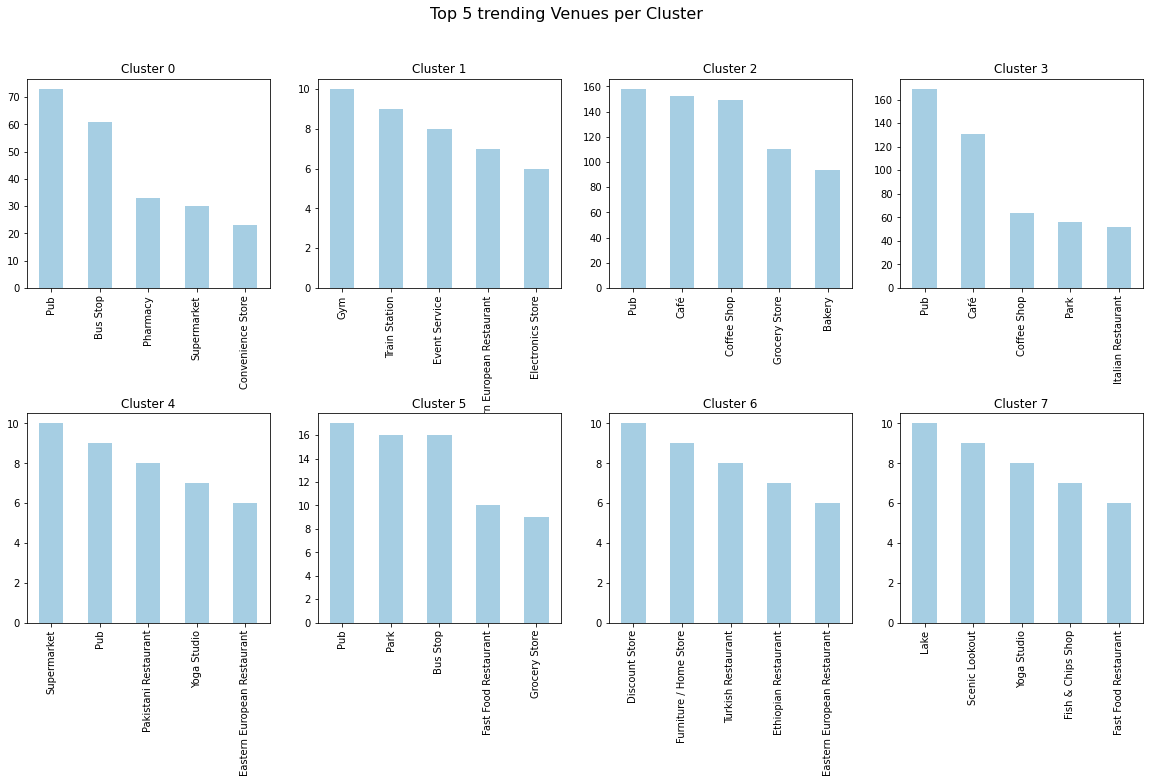

In [436]:
fig, axes = plt.subplots(2,4, figsize=(20,10))
fig.suptitle('Top 5 trending Venues per Cluster', fontsize=16)
plt.subplots_adjust(hspace=0.6)

cluster_0_rank.head(5).plot.bar(ax=axes[0,0],figsize=(6,6),subplots=True, legend=False, colormap='Paired', xlabel='')
cluster_1_rank.head(5).plot.bar(ax=axes[0,1],figsize=(6,6),subplots=True, legend=False, colormap='Paired', xlabel='')
cluster_2_rank.head(5).plot.bar(ax=axes[0,2],figsize=(6,6),subplots=True, legend=False, colormap='Paired', xlabel='')
cluster_3_rank.head(5).plot.bar(ax=axes[0,3],figsize=(6,6),subplots=True, legend=False, colormap='Paired', xlabel='')
cluster_4_rank.head(5).plot.bar(ax=axes[1,0],figsize=(6,6),subplots=True, legend=False, colormap='Paired', xlabel='')
cluster_5_rank.head(5).plot.bar(ax=axes[1,1],figsize=(6,6),subplots=True, legend=False, colormap='Paired', xlabel='')
cluster_6_rank.head(5).plot.bar(ax=axes[1,2],figsize=(6,6),subplots=True, legend=False, colormap='Paired', xlabel='')
cluster_7_rank.head(5).plot.bar(ax=axes[1,3],figsize=(6,6),subplots=True, legend=False, colormap='Paired', xlabel='')

## Now let's analyse trending venues in the Iner London

In [454]:
#using the same approach as before, the function will add points to each row
london_rank=pd.DataFrame(columns=['Venues','Points'])

In [455]:
score_london={7:10,8:9,9:8,10:7,11:6,12:5,13:4,14:3,15:2,16:1}

def london_score(london_merged, london_rank):
    for r in range(0,len(london_merged)):
        for c in range(7,16):

            if london_merged.iloc[r,c] in list(london_rank['Venues']):
                london_rank.iloc[london_rank[london_rank['Venues']==london_merged.iloc[r,c]].index.item(),1]+=score_london.get(c)
            elif london_merged.iloc[r,c] not in list(london_rank['Venues']):
                london_rank.loc[len(london_rank)]=[london_merged.iloc[r,c],0]
                london_rank.iloc[london_rank[london_rank['Venues']==london_merged.iloc[r,c]].index.item(),1]+=score_london.get(c)
            else:
                print(f'Error on ({r},{c})')
                
    london_rank.columns=['Venues','Inner London City']           
    london_rank.sort_values(['Inner London City'], ascending=False,inplace=True)
    london_rank.set_index(['Venues'], inplace=True)

In [456]:
london_score(london_merged, london_rank)

## These are the top trending venues in Inner London

In [457]:
london_rank.head(10)

,Inner London City
Venues,
Pub,426
Café,290
Coffee Shop,226
Grocery Store,159
Bakery,113
Italian Restaurant,111
Park,101
Pizza Place,95
Hotel,92


array([<AxesSubplot:title={'center':'Inner London City'}>], dtype=object)

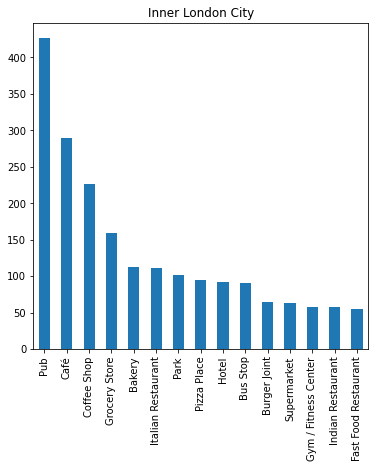

In [458]:
london_rank.head(15).plot.bar(figsize=(6,6),subplots=True, legend=False, xlabel='')

In London without any doubt, Pubs, Cafes and Coffee Shops are the most common places, and If I would like to follow the trend I certainly would include one of these places.

#### But what about the cost of opening one of these business?

Now, let's consider the first 6 option and below are reported the cost of opening in thousand of Pounds.

In [443]:
opening_costs={'Pub':26, 'Café':30, 'Coffee Shop':50, 'Grocery Store':99, 'Italian Restaurant':70, 'Bakery':40}
opening_costs

{'Pub': 26,
 'Café': 30,
 'Coffee Shop': 50,
 'Grocery Store': 99,
 'Italian Restaurant': 70,
 'Bakery': 40}

In [459]:
#The opening costs are now added to each place
london_rank['Opening Costs']=pd.Series(opening_costs)
london_rank

,Inner London City,Opening Costs
Venues,,
Pub,426,26.0
Café,290,30.0
Coffee Shop,226,50.0
Grocery Store,159,99.0
Bakery,113,40.0
...,...,...
Boxing Gym,2,NaN
Bike Rental / Bike Share,2,NaN
Kitchen Supply Store,2,NaN


But if we take in consideration costs as well as trendings?

I used the formula (100 - opening_cost) * trending and then sorted by highest points:

In [460]:
final_rank={}
for k,v in opening_costs.items():
    final_rank[k] = (100-v)*london_rank.loc[k,'Inner London City']

## 4.2 Final Dataframe where each trending place is weighted with its opening price:

In [462]:
london_rank['Final Rank']=pd.Series(final_rank)
london_rank.sort_values(['Final Rank'], ascending=False, inplace=True)
london_rank.drop(columns=['Inner London City', 'Opening Costs'], inplace=True)

<AxesSubplot:xlabel='Venues'>

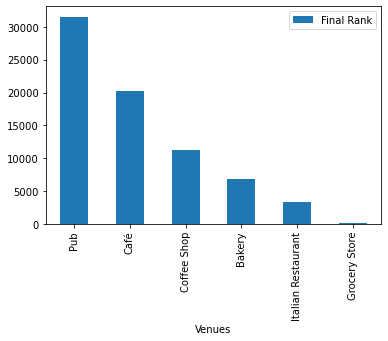

In [463]:
london_rank.head(6).plot.bar()

#### And as we can see from the previuos image, these alternatives are the most affordable trending venues to open in London.

## 5. Conclusions

In this final project I analyzed London and its neighourhoods, specifically I analyzed trending venues is each clustered neighourhood using ML with a kMeans algorithm.

Data on Postal codes was retrieved using Wikipedia pages with a web-scraper, then  I used the resulting dataframes to display the most common places in each neighourbood as well as in the Metropolitan area.

After that, I weighted each venue with a score, reflecting the position in the chart, and used the resulting information to answer the final question: **What is the most affordable trending place to open in the Metropolitan Area?**

And the answer is: **A Pub!**